<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [20]</a>'.</span>

## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548


0:	learn: 0.9945953	total: 56ms	remaining: 56s
1:	learn: 0.9746310	total: 58.7ms	remaining: 29.3s
2:	learn: 0.9543903	total: 61.8ms	remaining: 20.5s
3:	learn: 0.9370738	total: 64.6ms	remaining: 16.1s
4:	learn: 0.9163887	total: 67.4ms	remaining: 13.4s
5:	learn: 0.8980765	total: 69.1ms	remaining: 11.4s
6:	learn: 0.8798105	total: 71.5ms	remaining: 10.1s
7:	learn: 0.8626523	total: 73.3ms	remaining: 9.09s
8:	learn: 0.8464469	total: 75.3ms	remaining: 8.29s
9:	learn: 0.8293615	total: 77.2ms	remaining: 7.64s
10:	learn: 0.8132068	total: 78.9ms	remaining: 7.09s
11:	learn: 0.7983497	total: 81.3ms	remaining: 6.7s
12:	learn: 0.7824549	total: 83.9ms	remaining: 6.37s
13:	learn: 0.7672576	total: 86.5ms	remaining: 6.09s
14:	learn: 0.7546900	total: 88.6ms	remaining: 5.82s
15:	learn: 0.7408590	total: 92.2ms	remaining: 5.67s
16:	learn: 0.7295087	total: 96ms	remaining: 5.55s
17:	learn: 0.7177578	total: 99.2ms	remaining: 5.41s
18:	learn: 0.7055643	total: 102ms	remaining: 5.25s
19:	learn: 0.6924518	total: 10

55:	learn: 0.4281731	total: 183ms	remaining: 3.09s
56:	learn: 0.4247612	total: 185ms	remaining: 3.07s
57:	learn: 0.4207522	total: 190ms	remaining: 3.08s
58:	learn: 0.4160766	total: 193ms	remaining: 3.07s


59:	learn: 0.4116898	total: 348ms	remaining: 5.46s
60:	learn: 0.4085334	total: 351ms	remaining: 5.4s
61:	learn: 0.4043259	total: 353ms	remaining: 5.34s
62:	learn: 0.4002970	total: 356ms	remaining: 5.29s


63:	learn: 0.3958255	total: 358ms	remaining: 5.24s
64:	learn: 0.3921193	total: 360ms	remaining: 5.17s
65:	learn: 0.3894659	total: 363ms	remaining: 5.13s
66:	learn: 0.3859825	total: 365ms	remaining: 5.08s
67:	learn: 0.3834069	total: 368ms	remaining: 5.05s
68:	learn: 0.3802449	total: 371ms	remaining: 5.01s
69:	learn: 0.3773531	total: 374ms	remaining: 4.97s
70:	learn: 0.3742663	total: 377ms	remaining: 4.93s
71:	learn: 0.3707596	total: 380ms	remaining: 4.89s
72:	learn: 0.3685961	total: 382ms	remaining: 4.85s
73:	learn: 0.3658680	total: 384ms	remaining: 4.8s
74:	learn: 0.3635739	total: 386ms	remaining: 4.76s
75:	learn: 0.3603508	total: 388ms	remaining: 4.72s
76:	learn: 0.3567104	total: 390ms	remaining: 4.67s
77:	learn: 0.3536871	total: 392ms	remaining: 4.63s
78:	learn: 0.3510355	total: 393ms	remaining: 4.59s
79:	learn: 0.3488967	total: 395ms	remaining: 4.54s
80:	learn: 0.3467906	total: 397ms	remaining: 4.51s
81:	learn: 0.3445793	total: 400ms	remaining: 4.47s
82:	learn: 0.3416412	total: 402m

112:	learn: 0.2905169	total: 512ms	remaining: 4.01s


113:	learn: 0.2892823	total: 516ms	remaining: 4.01s
114:	learn: 0.2878635	total: 521ms	remaining: 4.01s
115:	learn: 0.2855870	total: 523ms	remaining: 3.98s
116:	learn: 0.2841390	total: 524ms	remaining: 3.96s
117:	learn: 0.2829541	total: 526ms	remaining: 3.93s
118:	learn: 0.2818830	total: 528ms	remaining: 3.91s
119:	learn: 0.2810729	total: 531ms	remaining: 3.89s
120:	learn: 0.2793813	total: 533ms	remaining: 3.87s
121:	learn: 0.2778018	total: 535ms	remaining: 3.85s
122:	learn: 0.2767899	total: 537ms	remaining: 3.83s
123:	learn: 0.2758643	total: 539ms	remaining: 3.81s
124:	learn: 0.2748712	total: 541ms	remaining: 3.79s
125:	learn: 0.2736957	total: 544ms	remaining: 3.77s
126:	learn: 0.2719547	total: 547ms	remaining: 3.76s
127:	learn: 0.2707707	total: 549ms	remaining: 3.74s
128:	learn: 0.2699339	total: 551ms	remaining: 3.72s
129:	learn: 0.2690829	total: 554ms	remaining: 3.71s
130:	learn: 0.2678695	total: 557ms	remaining: 3.69s
131:	learn: 0.2667063	total: 559ms	remaining: 3.67s
132:	learn: 

159:	learn: 0.2426526	total: 675ms	remaining: 3.54s
160:	learn: 0.2416440	total: 677ms	remaining: 3.53s
161:	learn: 0.2411452	total: 680ms	remaining: 3.52s
162:	learn: 0.2407104	total: 682ms	remaining: 3.5s
163:	learn: 0.2400746	total: 685ms	remaining: 3.49s
164:	learn: 0.2392608	total: 687ms	remaining: 3.48s
165:	learn: 0.2385233	total: 690ms	remaining: 3.46s
166:	learn: 0.2376389	total: 692ms	remaining: 3.45s
167:	learn: 0.2369891	total: 695ms	remaining: 3.44s
168:	learn: 0.2363960	total: 698ms	remaining: 3.43s
169:	learn: 0.2356670	total: 702ms	remaining: 3.43s
170:	learn: 0.2351198	total: 707ms	remaining: 3.43s
171:	learn: 0.2341002	total: 716ms	remaining: 3.45s
172:	learn: 0.2333552	total: 718ms	remaining: 3.43s
173:	learn: 0.2325710	total: 722ms	remaining: 3.43s
174:	learn: 0.2320103	total: 730ms	remaining: 3.44s
175:	learn: 0.2311274	total: 734ms	remaining: 3.44s
176:	learn: 0.2302943	total: 740ms	remaining: 3.44s
177:	learn: 0.2292249	total: 743ms	remaining: 3.43s
178:	learn: 0

207:	learn: 0.2106188	total: 850ms	remaining: 3.24s
208:	learn: 0.2101693	total: 853ms	remaining: 3.23s
209:	learn: 0.2097045	total: 855ms	remaining: 3.22s
210:	learn: 0.2091014	total: 857ms	remaining: 3.2s
211:	learn: 0.2083767	total: 859ms	remaining: 3.19s
212:	learn: 0.2079848	total: 862ms	remaining: 3.18s
213:	learn: 0.2076152	total: 864ms	remaining: 3.17s
214:	learn: 0.2070494	total: 867ms	remaining: 3.16s
215:	learn: 0.2067676	total: 869ms	remaining: 3.15s
216:	learn: 0.2063298	total: 872ms	remaining: 3.15s
217:	learn: 0.2059861	total: 873ms	remaining: 3.13s
218:	learn: 0.2053948	total: 875ms	remaining: 3.12s
219:	learn: 0.2049767	total: 877ms	remaining: 3.11s
220:	learn: 0.2043650	total: 879ms	remaining: 3.1s
221:	learn: 0.2037964	total: 882ms	remaining: 3.09s
222:	learn: 0.2033685	total: 885ms	remaining: 3.08s
223:	learn: 0.2027133	total: 887ms	remaining: 3.07s
224:	learn: 0.2020341	total: 890ms	remaining: 3.06s
225:	learn: 0.2014357	total: 892ms	remaining: 3.06s
226:	learn: 0.

267:	learn: 0.1820258	total: 1.04s	remaining: 2.84s
268:	learn: 0.1815912	total: 1.04s	remaining: 2.83s
269:	learn: 0.1812439	total: 1.04s	remaining: 2.82s
270:	learn: 0.1807241	total: 1.04s	remaining: 2.81s
271:	learn: 0.1801598	total: 1.05s	remaining: 2.8s
272:	learn: 0.1796591	total: 1.05s	remaining: 2.8s
273:	learn: 0.1792352	total: 1.05s	remaining: 2.79s
274:	learn: 0.1789498	total: 1.06s	remaining: 2.78s
275:	learn: 0.1784217	total: 1.06s	remaining: 2.78s
276:	learn: 0.1782704	total: 1.06s	remaining: 2.77s
277:	learn: 0.1781283	total: 1.06s	remaining: 2.76s
278:	learn: 0.1776155	total: 1.06s	remaining: 2.75s
279:	learn: 0.1772343	total: 1.07s	remaining: 2.75s
280:	learn: 0.1766904	total: 1.07s	remaining: 2.74s
281:	learn: 0.1762496	total: 1.07s	remaining: 2.73s
282:	learn: 0.1758904	total: 1.08s	remaining: 2.73s
283:	learn: 0.1753778	total: 1.08s	remaining: 2.72s
284:	learn: 0.1748171	total: 1.08s	remaining: 2.71s
285:	learn: 0.1744345	total: 1.08s	remaining: 2.71s
286:	learn: 0.

335:	learn: 0.1592283	total: 1.21s	remaining: 2.4s
336:	learn: 0.1588938	total: 1.21s	remaining: 2.39s
337:	learn: 0.1586191	total: 1.22s	remaining: 2.38s
338:	learn: 0.1581362	total: 1.22s	remaining: 2.38s
339:	learn: 0.1578684	total: 1.22s	remaining: 2.37s
340:	learn: 0.1577394	total: 1.22s	remaining: 2.36s
341:	learn: 0.1574633	total: 1.23s	remaining: 2.36s
342:	learn: 0.1573489	total: 1.23s	remaining: 2.35s
343:	learn: 0.1569914	total: 1.23s	remaining: 2.34s
344:	learn: 0.1567081	total: 1.23s	remaining: 2.33s
345:	learn: 0.1564469	total: 1.23s	remaining: 2.33s
346:	learn: 0.1562913	total: 1.23s	remaining: 2.32s
347:	learn: 0.1561315	total: 1.24s	remaining: 2.32s
348:	learn: 0.1561014	total: 1.24s	remaining: 2.31s
349:	learn: 0.1556724	total: 1.24s	remaining: 2.3s
350:	learn: 0.1556107	total: 1.24s	remaining: 2.3s
351:	learn: 0.1552649	total: 1.24s	remaining: 2.29s
352:	learn: 0.1549041	total: 1.25s	remaining: 2.28s
353:	learn: 0.1548766	total: 1.25s	remaining: 2.28s
354:	learn: 0.1

419:	learn: 0.1354365	total: 1.39s	remaining: 1.92s
420:	learn: 0.1353534	total: 1.4s	remaining: 1.92s
421:	learn: 0.1351077	total: 1.4s	remaining: 1.91s
422:	learn: 0.1350274	total: 1.4s	remaining: 1.91s
423:	learn: 0.1348433	total: 1.4s	remaining: 1.91s
424:	learn: 0.1347454	total: 1.41s	remaining: 1.9s
425:	learn: 0.1343742	total: 1.41s	remaining: 1.9s
426:	learn: 0.1341925	total: 1.41s	remaining: 1.89s
427:	learn: 0.1338117	total: 1.41s	remaining: 1.89s
428:	learn: 0.1334395	total: 1.42s	remaining: 1.88s
429:	learn: 0.1332126	total: 1.42s	remaining: 1.88s
430:	learn: 0.1331124	total: 1.42s	remaining: 1.87s
431:	learn: 0.1327381	total: 1.42s	remaining: 1.87s
432:	learn: 0.1323423	total: 1.43s	remaining: 1.87s
433:	learn: 0.1319401	total: 1.43s	remaining: 1.86s
434:	learn: 0.1315320	total: 1.43s	remaining: 1.86s
435:	learn: 0.1312450	total: 1.43s	remaining: 1.85s
436:	learn: 0.1310354	total: 1.43s	remaining: 1.85s
437:	learn: 0.1307754	total: 1.44s	remaining: 1.84s
438:	learn: 0.1303

503:	learn: 0.1153904	total: 1.57s	remaining: 1.55s
504:	learn: 0.1151795	total: 1.58s	remaining: 1.55s
505:	learn: 0.1151250	total: 1.58s	remaining: 1.54s
506:	learn: 0.1149170	total: 1.58s	remaining: 1.54s
507:	learn: 0.1148703	total: 1.59s	remaining: 1.54s
508:	learn: 0.1146283	total: 1.59s	remaining: 1.53s
509:	learn: 0.1144059	total: 1.59s	remaining: 1.53s
510:	learn: 0.1141264	total: 1.59s	remaining: 1.52s
511:	learn: 0.1139585	total: 1.59s	remaining: 1.52s
512:	learn: 0.1138092	total: 1.6s	remaining: 1.52s
513:	learn: 0.1135787	total: 1.6s	remaining: 1.51s
514:	learn: 0.1134591	total: 1.6s	remaining: 1.51s
515:	learn: 0.1132223	total: 1.61s	remaining: 1.51s
516:	learn: 0.1131634	total: 1.61s	remaining: 1.5s
517:	learn: 0.1129208	total: 1.61s	remaining: 1.5s
518:	learn: 0.1127065	total: 1.62s	remaining: 1.5s
519:	learn: 0.1124145	total: 1.62s	remaining: 1.5s
520:	learn: 0.1121210	total: 1.63s	remaining: 1.5s
521:	learn: 0.1118008	total: 1.63s	remaining: 1.5s
522:	learn: 0.1117484

558:	learn: 0.1054460	total: 1.75s	remaining: 1.38s
559:	learn: 0.1053296	total: 1.75s	remaining: 1.37s
560:	learn: 0.1051065	total: 1.75s	remaining: 1.37s
561:	learn: 0.1048003	total: 1.75s	remaining: 1.37s
562:	learn: 0.1047104	total: 1.76s	remaining: 1.36s
563:	learn: 0.1046815	total: 1.76s	remaining: 1.36s
564:	learn: 0.1045223	total: 1.76s	remaining: 1.36s
565:	learn: 0.1043542	total: 1.76s	remaining: 1.35s
566:	learn: 0.1040993	total: 1.77s	remaining: 1.35s
567:	learn: 0.1038929	total: 1.77s	remaining: 1.35s
568:	learn: 0.1036735	total: 1.77s	remaining: 1.34s
569:	learn: 0.1035825	total: 1.77s	remaining: 1.34s
570:	learn: 0.1033893	total: 1.78s	remaining: 1.33s
571:	learn: 0.1032575	total: 1.78s	remaining: 1.33s
572:	learn: 0.1030444	total: 1.78s	remaining: 1.33s
573:	learn: 0.1027937	total: 1.78s	remaining: 1.32s
574:	learn: 0.1026206	total: 1.79s	remaining: 1.32s
575:	learn: 0.1023317	total: 1.79s	remaining: 1.32s
576:	learn: 0.1023095	total: 1.79s	remaining: 1.31s
577:	learn: 

634:	learn: 0.0936508	total: 1.92s	remaining: 1.1s
635:	learn: 0.0935477	total: 1.93s	remaining: 1.1s
636:	learn: 0.0933613	total: 1.93s	remaining: 1.1s
637:	learn: 0.0933076	total: 1.93s	remaining: 1.09s
638:	learn: 0.0931711	total: 1.93s	remaining: 1.09s
639:	learn: 0.0930525	total: 1.93s	remaining: 1.09s
640:	learn: 0.0929553	total: 1.93s	remaining: 1.08s
641:	learn: 0.0927880	total: 1.94s	remaining: 1.08s
642:	learn: 0.0926357	total: 1.94s	remaining: 1.07s
643:	learn: 0.0924992	total: 1.94s	remaining: 1.07s
644:	learn: 0.0922916	total: 1.94s	remaining: 1.07s
645:	learn: 0.0921078	total: 1.94s	remaining: 1.06s
646:	learn: 0.0919686	total: 1.95s	remaining: 1.06s
647:	learn: 0.0919125	total: 1.95s	remaining: 1.06s
648:	learn: 0.0918294	total: 1.95s	remaining: 1.05s
649:	learn: 0.0916338	total: 1.95s	remaining: 1.05s
650:	learn: 0.0914457	total: 1.95s	remaining: 1.05s
651:	learn: 0.0913589	total: 1.96s	remaining: 1.04s
652:	learn: 0.0912478	total: 1.96s	remaining: 1.04s
653:	learn: 0.0

708:	learn: 0.0836922	total: 2.1s	remaining: 862ms
709:	learn: 0.0835340	total: 2.1s	remaining: 859ms
710:	learn: 0.0833799	total: 2.11s	remaining: 856ms
711:	learn: 0.0833076	total: 2.11s	remaining: 853ms
712:	learn: 0.0832388	total: 2.11s	remaining: 850ms
713:	learn: 0.0832322	total: 2.11s	remaining: 847ms
714:	learn: 0.0831745	total: 2.12s	remaining: 843ms
715:	learn: 0.0829778	total: 2.12s	remaining: 840ms
716:	learn: 0.0829449	total: 2.12s	remaining: 837ms
717:	learn: 0.0826936	total: 2.12s	remaining: 834ms
718:	learn: 0.0826207	total: 2.13s	remaining: 831ms
719:	learn: 0.0825220	total: 2.13s	remaining: 828ms
720:	learn: 0.0824035	total: 2.13s	remaining: 825ms
721:	learn: 0.0822626	total: 2.13s	remaining: 822ms
722:	learn: 0.0821219	total: 2.14s	remaining: 819ms
723:	learn: 0.0819356	total: 2.14s	remaining: 816ms
724:	learn: 0.0817759	total: 2.14s	remaining: 813ms
725:	learn: 0.0816725	total: 2.15s	remaining: 810ms
726:	learn: 0.0816064	total: 2.15s	remaining: 807ms
727:	learn: 0.

781:	learn: 0.0755481	total: 2.28s	remaining: 635ms
782:	learn: 0.0752815	total: 2.28s	remaining: 632ms
783:	learn: 0.0751553	total: 2.28s	remaining: 629ms
784:	learn: 0.0750792	total: 2.28s	remaining: 626ms
785:	learn: 0.0749832	total: 2.29s	remaining: 623ms
786:	learn: 0.0748637	total: 2.29s	remaining: 619ms
787:	learn: 0.0747846	total: 2.29s	remaining: 616ms
788:	learn: 0.0747036	total: 2.29s	remaining: 613ms
789:	learn: 0.0745262	total: 2.29s	remaining: 610ms
790:	learn: 0.0744069	total: 2.3s	remaining: 607ms
791:	learn: 0.0742967	total: 2.3s	remaining: 604ms
792:	learn: 0.0742262	total: 2.3s	remaining: 600ms
793:	learn: 0.0741000	total: 2.3s	remaining: 597ms
794:	learn: 0.0738457	total: 2.3s	remaining: 594ms
795:	learn: 0.0736526	total: 2.31s	remaining: 591ms
796:	learn: 0.0735070	total: 2.31s	remaining: 588ms
797:	learn: 0.0733843	total: 2.31s	remaining: 585ms
798:	learn: 0.0733139	total: 2.31s	remaining: 582ms
799:	learn: 0.0730489	total: 2.32s	remaining: 579ms
800:	learn: 0.072

840:	learn: 0.0689704	total: 2.45s	remaining: 463ms
841:	learn: 0.0687877	total: 2.45s	remaining: 460ms
842:	learn: 0.0686079	total: 2.45s	remaining: 457ms
843:	learn: 0.0685693	total: 2.46s	remaining: 454ms
844:	learn: 0.0685324	total: 2.46s	remaining: 451ms
845:	learn: 0.0684564	total: 2.46s	remaining: 448ms
846:	learn: 0.0682956	total: 2.46s	remaining: 445ms
847:	learn: 0.0682496	total: 2.46s	remaining: 442ms
848:	learn: 0.0681353	total: 2.47s	remaining: 439ms
849:	learn: 0.0680407	total: 2.47s	remaining: 436ms
850:	learn: 0.0679393	total: 2.48s	remaining: 434ms
851:	learn: 0.0678530	total: 2.48s	remaining: 431ms
852:	learn: 0.0677942	total: 2.49s	remaining: 429ms
853:	learn: 0.0676609	total: 2.49s	remaining: 426ms
854:	learn: 0.0674943	total: 2.5s	remaining: 423ms
855:	learn: 0.0674311	total: 2.5s	remaining: 420ms
856:	learn: 0.0673975	total: 2.5s	remaining: 417ms
857:	learn: 0.0673177	total: 2.5s	remaining: 414ms
858:	learn: 0.0672873	total: 2.5s	remaining: 411ms
859:	learn: 0.067

885:	learn: 0.0648672	total: 2.62s	remaining: 337ms
886:	learn: 0.0647827	total: 2.62s	remaining: 334ms
887:	learn: 0.0646777	total: 2.62s	remaining: 331ms
888:	learn: 0.0645745	total: 2.62s	remaining: 328ms
889:	learn: 0.0644593	total: 2.63s	remaining: 325ms
890:	learn: 0.0644007	total: 2.63s	remaining: 322ms
891:	learn: 0.0642368	total: 2.63s	remaining: 319ms
892:	learn: 0.0641788	total: 2.63s	remaining: 316ms
893:	learn: 0.0640490	total: 2.64s	remaining: 313ms
894:	learn: 0.0639892	total: 2.64s	remaining: 310ms
895:	learn: 0.0639037	total: 2.64s	remaining: 307ms
896:	learn: 0.0638383	total: 2.65s	remaining: 304ms
897:	learn: 0.0637984	total: 2.65s	remaining: 301ms
898:	learn: 0.0637042	total: 2.65s	remaining: 298ms
899:	learn: 0.0636195	total: 2.65s	remaining: 295ms
900:	learn: 0.0635463	total: 2.66s	remaining: 292ms
901:	learn: 0.0634292	total: 2.66s	remaining: 289ms
902:	learn: 0.0632982	total: 2.66s	remaining: 286ms
903:	learn: 0.0631642	total: 2.67s	remaining: 283ms
904:	learn: 

927:	learn: 0.0612960	total: 2.77s	remaining: 215ms
928:	learn: 0.0612104	total: 2.77s	remaining: 212ms
929:	learn: 0.0610652	total: 2.78s	remaining: 209ms
930:	learn: 0.0609388	total: 2.78s	remaining: 206ms
931:	learn: 0.0609084	total: 2.78s	remaining: 203ms
932:	learn: 0.0608504	total: 2.78s	remaining: 200ms
933:	learn: 0.0608079	total: 2.79s	remaining: 197ms
934:	learn: 0.0607410	total: 2.79s	remaining: 194ms
935:	learn: 0.0605725	total: 2.79s	remaining: 191ms
936:	learn: 0.0604923	total: 2.79s	remaining: 188ms
937:	learn: 0.0603786	total: 2.8s	remaining: 185ms
938:	learn: 0.0602855	total: 2.8s	remaining: 182ms
939:	learn: 0.0602750	total: 2.8s	remaining: 179ms
940:	learn: 0.0601793	total: 2.81s	remaining: 176ms
941:	learn: 0.0600854	total: 2.81s	remaining: 173ms
942:	learn: 0.0600219	total: 2.81s	remaining: 170ms
943:	learn: 0.0598855	total: 2.81s	remaining: 167ms
944:	learn: 0.0598305	total: 2.81s	remaining: 164ms
945:	learn: 0.0597746	total: 2.82s	remaining: 161ms
946:	learn: 0.0

981:	learn: 0.0573892	total: 2.93s	remaining: 53.7ms
982:	learn: 0.0572898	total: 2.93s	remaining: 50.7ms
983:	learn: 0.0572163	total: 2.93s	remaining: 47.7ms
984:	learn: 0.0571935	total: 2.94s	remaining: 44.7ms
985:	learn: 0.0571654	total: 2.94s	remaining: 41.7ms
986:	learn: 0.0571310	total: 2.94s	remaining: 38.8ms
987:	learn: 0.0570862	total: 2.95s	remaining: 35.8ms
988:	learn: 0.0569489	total: 2.95s	remaining: 32.8ms
989:	learn: 0.0569061	total: 2.95s	remaining: 29.8ms
990:	learn: 0.0568623	total: 2.96s	remaining: 26.8ms
991:	learn: 0.0568464	total: 2.96s	remaining: 23.9ms
992:	learn: 0.0568086	total: 2.96s	remaining: 20.9ms
993:	learn: 0.0567461	total: 2.96s	remaining: 17.9ms
994:	learn: 0.0566957	total: 2.97s	remaining: 14.9ms
995:	learn: 0.0566270	total: 2.97s	remaining: 11.9ms
996:	learn: 0.0565282	total: 2.97s	remaining: 8.94ms
997:	learn: 0.0564180	total: 2.98s	remaining: 5.96ms
998:	learn: 0.0563540	total: 2.98s	remaining: 2.98ms
999:	learn: 0.0562875	total: 2.98s	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.18968100337491692
ABC Pre-generator MAE 0.8616230252512638


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

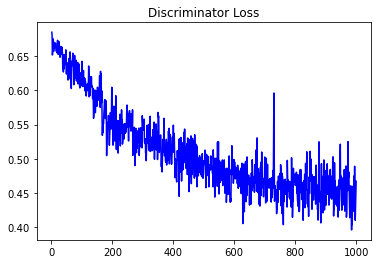

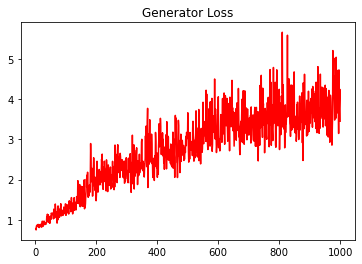

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.23312262031441444


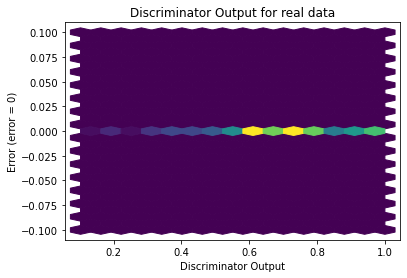

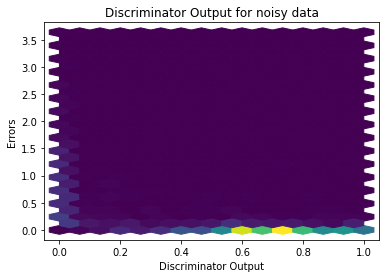

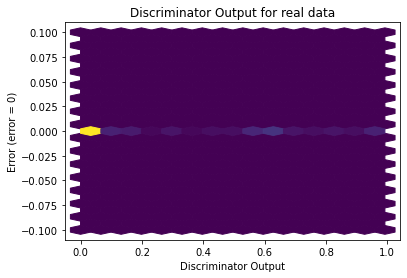

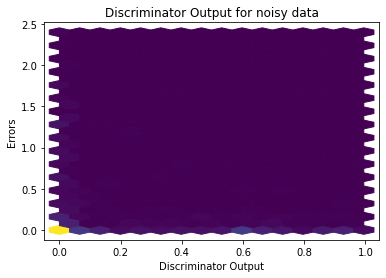

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

NameError: name 'disc3' is not defined

In [ ]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [ ]:
# #Generator
# gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc4 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


In [ ]:
# ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [ ]:
# ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

# print("MAE")
# print(mean(ABC_GAN4_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc4,device)
# sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen4.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())